<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 102.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 117.3 MB/s eta 0:00:00


In [2]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 142.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 120.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 112.6 MB/s eta 0:00:00


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-07-07 07:08:09--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  64.1MB/s    in 2.4s    

2025-07-07 07:08:12 (64.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [15]:
pd.set_option('display.max_rows', None)
print(df.dtypes)

ResponseId                          int64
MainBranch                         object
Age                                object
Employment                         object
RemoteWork                         object
Check                              object
CodingActivities                   object
EdLevel                            object
LearnCode                          object
LearnCodeOnline                    object
TechDoc                            object
YearsCode                          object
YearsCodePro                       object
DevType                            object
OrgSize                            object
PurchaseInfluence                  object
BuyNewTool                         object
BuildvsBuy                         object
TechEndorse                        object
Country                            object
Currency                           object
CompTotal                         float64
LanguageHaveWorkedWith             object
LanguageWantToWorkWith            

### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



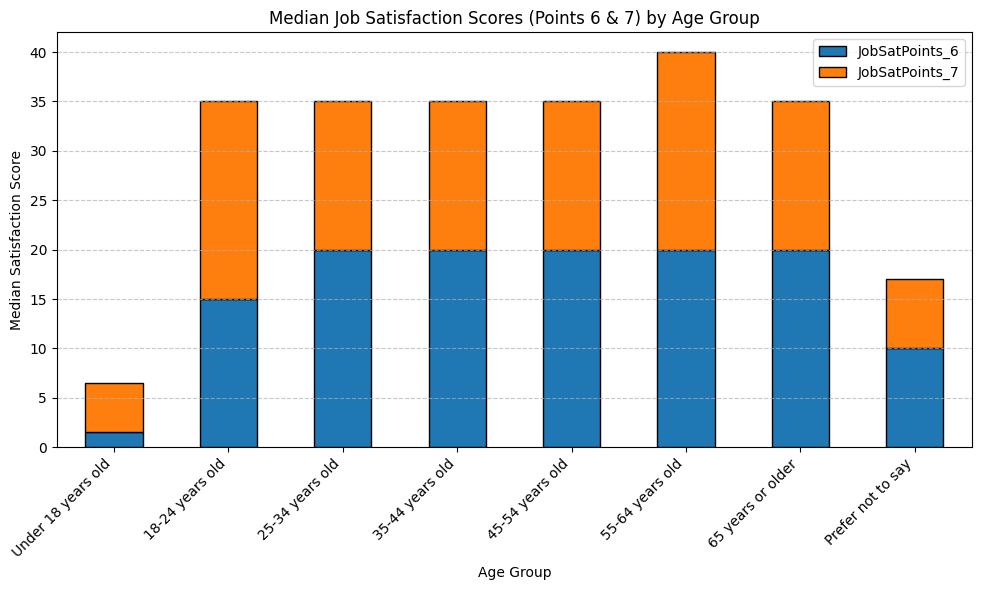

In [7]:
##Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop rows where Age or satisfaction points are missing
df_filtered = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])

# Step 2: Calculate median satisfaction scores grouped by Age
median_satisfaction = df_filtered.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Step 3: Sort age groups if needed (optional, depends on your Age labels)
# For example, if Age groups are like '18-24 years old', '25-34 years old', etc., you can define a custom order:
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', 
    '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say'
]
median_satisfaction = median_satisfaction.reindex(age_order).dropna()

# Step 4: Plot stacked bar chart
ax = median_satisfaction.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10,6), 
    color=['#1f77b4', '#ff7f0e'],  # Customize colors as you like
    edgecolor='black'
)

plt.title('Median Job Satisfaction Scores (Points 6 & 7) by Age Group')
plt.ylabel('Median Satisfaction Score')
plt.xlabel('Age Group')
plt.xticks(rotation=45, ha='right')
plt.legend(['JobSatPoints_6', 'JobSatPoints_7'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


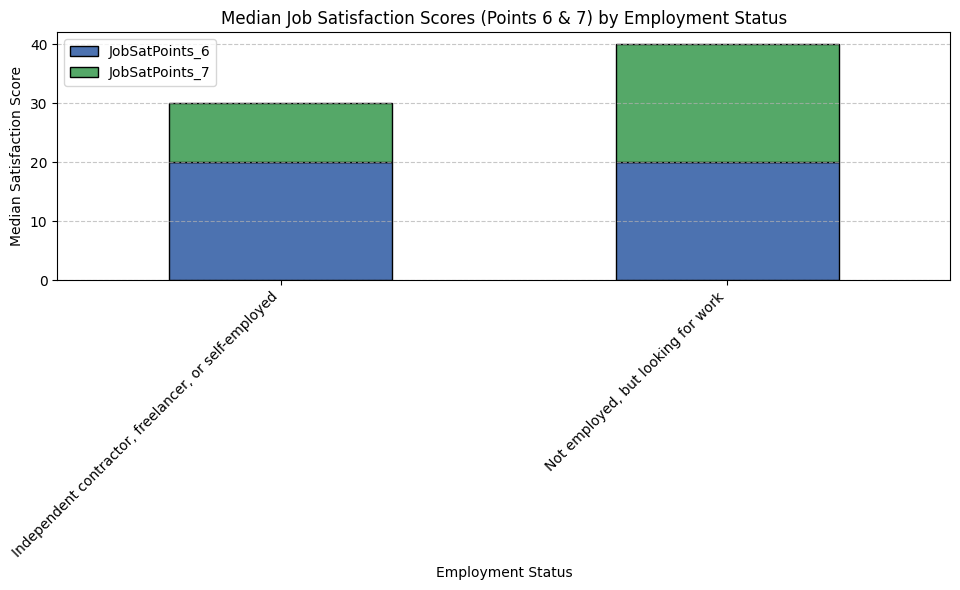

In [8]:
##Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter out rows with missing values in relevant columns
df_filtered = df.dropna(subset=['Employment', 'JobSatPoints_6', 'JobSatPoints_7'])

# Step 2: Group by Employment status and calculate median satisfaction scores
median_satisfaction = df_filtered.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Optional: Sort employment categories if you want a specific order
# For example:
employment_order = [
    'Employed full-time', 'Employed part-time', 'Independent contractor, freelancer, or self-employed',
    'Not employed, but looking for work', 'Not employed, and not looking for work',
    'Retired', 'Student', 'Other'
]
median_satisfaction = median_satisfaction.reindex(employment_order).dropna()

# Step 3: Plot stacked bar chart
ax = median_satisfaction.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['#4c72b0', '#55a868'],
    edgecolor='black'
)

plt.title('Median Job Satisfaction Scores (Points 6 & 7) by Employment Status')
plt.ylabel('Median Satisfaction Score')
plt.xlabel('Employment Status')
plt.xticks(rotation=45, ha='right')
plt.legend(['JobSatPoints_6', 'JobSatPoints_7'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


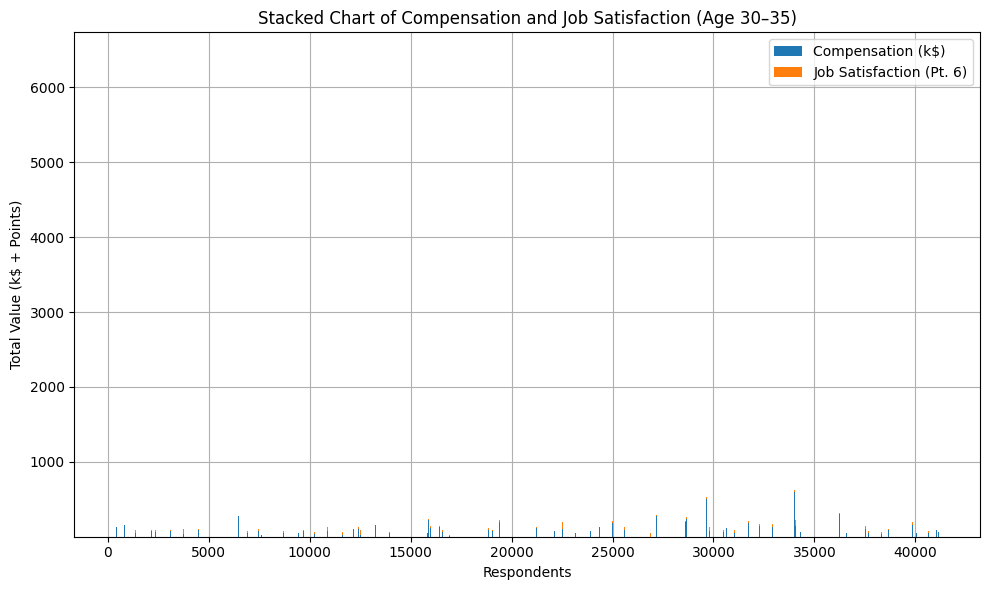

In [17]:
##Write your code here


# Load your DataFrame, assuming it's already named df

# Step 1: Clean and filter the age group
df['Age_clean'] = df['Age'].astype(str).str.extract(r'(\d{2})')  # Extract numeric part of age ranges
df['Age_clean'] = pd.to_numeric(df['Age_clean'], errors='coerce')

# Step 2: Filter for age group 30–35
df_30_35 = df[(df['Age_clean'] >= 30) & (df['Age_clean'] <= 35)]

# Step 3: Drop rows with missing values in the two columns of interest
df_filtered = df_30_35[['ConvertedCompYearly', 'JobSatPoints_6']].dropna()

# Step 4: Create buckets or summarize the values
# Optional: Normalize or log-scale compensation for better visualization
df_filtered['Compensation_k'] = df_filtered['ConvertedCompYearly'] / 1000  # Convert to thousands for readability

# Step 5: Plot stacked chart
plt.figure(figsize=(10, 6))
plt.bar(df_filtered.index, df_filtered['Compensation_k'], label='Compensation (k$)')
plt.bar(df_filtered.index, df_filtered['JobSatPoints_6'], bottom=df_filtered['Compensation_k'], label='Job Satisfaction (Pt. 6)')

plt.title('Stacked Chart of Compensation and Job Satisfaction (Age 30–35)')
plt.xlabel('Respondents')
plt.ylabel('Total Value (k$ + Points)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


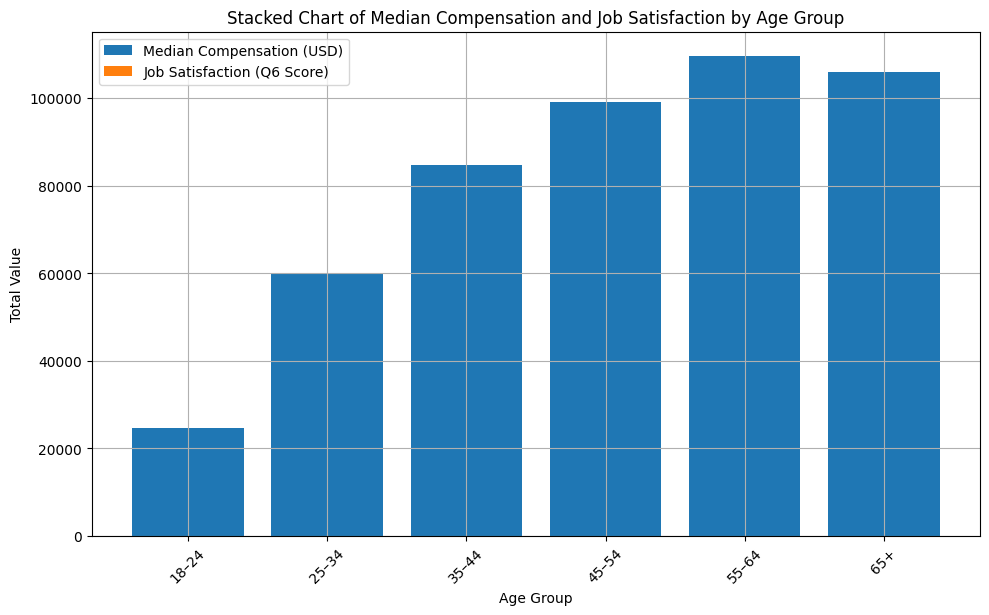

In [25]:
##Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define age bins
age_bins = [0, 24, 34, 44, 54, 64, 100]
age_labels = ['18–24', '25–34', '35–44', '45–54', '55–64', '65+']

# Step 2: Extract numeric age and bin it
df['Age_num'] = df['Age'].astype(str).str.extract(r'(\d{2})')
df['Age_num'] = pd.to_numeric(df['Age_num'], errors='coerce')
df['AgeGroup'] = pd.cut(df['Age_num'], bins=age_bins, labels=age_labels, right=True)

# Step 3: Group by AgeGroup and calculate median compensation and satisfaction
grouped = df.groupby('AgeGroup', observed=True)[['ConvertedCompYearly', 'JobSatPoints_6']].median().dropna()




# Step 4: Optional - Normalize values for visual comparability
# grouped['Comp_k'] = grouped['ConvertedCompYearly'] / 1000
# grouped['Sat_scaled'] = grouped['JobSatPoints_6'] * 10  # adjust scaling if needed

# Step 5: Plot as stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped.index, grouped['ConvertedCompYearly'], label='Median Compensation (USD)')
plt.bar(grouped.index, grouped['JobSatPoints_6'], 
        bottom=grouped['ConvertedCompYearly'], 
        label='Job Satisfaction (Q6 Score)')

plt.title('Stacked Chart of Median Compensation and Job Satisfaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Value')
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid()
plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


In [11]:
##Write your code here

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


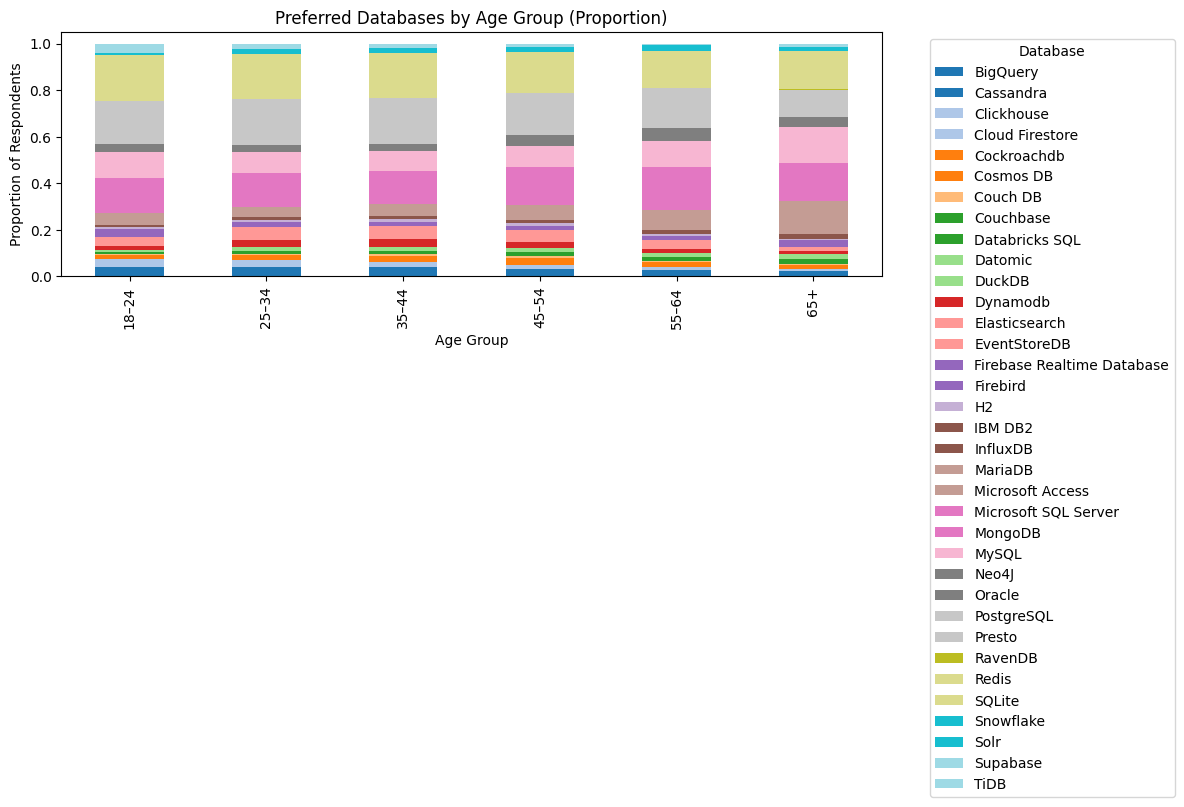

In [27]:
##Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define age groups
age_bins = [0, 24, 34, 44, 54, 64, 100]
age_labels = ['18–24', '25–34', '35–44', '45–54', '55–64', '65+']

# Extract numeric part of Age column
df['Age_num'] = df['Age'].astype(str).str.extract(r'(\d{2})')
df['Age_num'] = pd.to_numeric(df['Age_num'], errors='coerce')
df['AgeGroup'] = pd.cut(df['Age_num'], bins=age_bins, labels=age_labels, right=True)

# Step 2: Expand multi-select 'DatabaseWantToWorkWith' into individual rows
df_expanded = df[['AgeGroup', 'DatabaseWantToWorkWith']].dropna()
df_expanded = df_expanded.assign(Database=df_expanded['DatabaseWantToWorkWith'].str.split(';'))
df_exploded = df_expanded.explode('Database')

# Step 3: Count database preferences per age group
counts = df_exploded.groupby(['AgeGroup', 'Database'], observed=True).size().reset_index(name='Count')

# Step 4: Pivot for stacked bar plot
pivot_df = counts.pivot(index='AgeGroup', columns='Database', values='Count').fillna(0)

# Step 5: Convert counts to proportions (row-wise)
pivot_df_prop = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Step 6: Plot stacked bar chart
pivot_df_prop.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

plt.title('Preferred Databases by Age Group (Proportion)')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Respondents')
plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


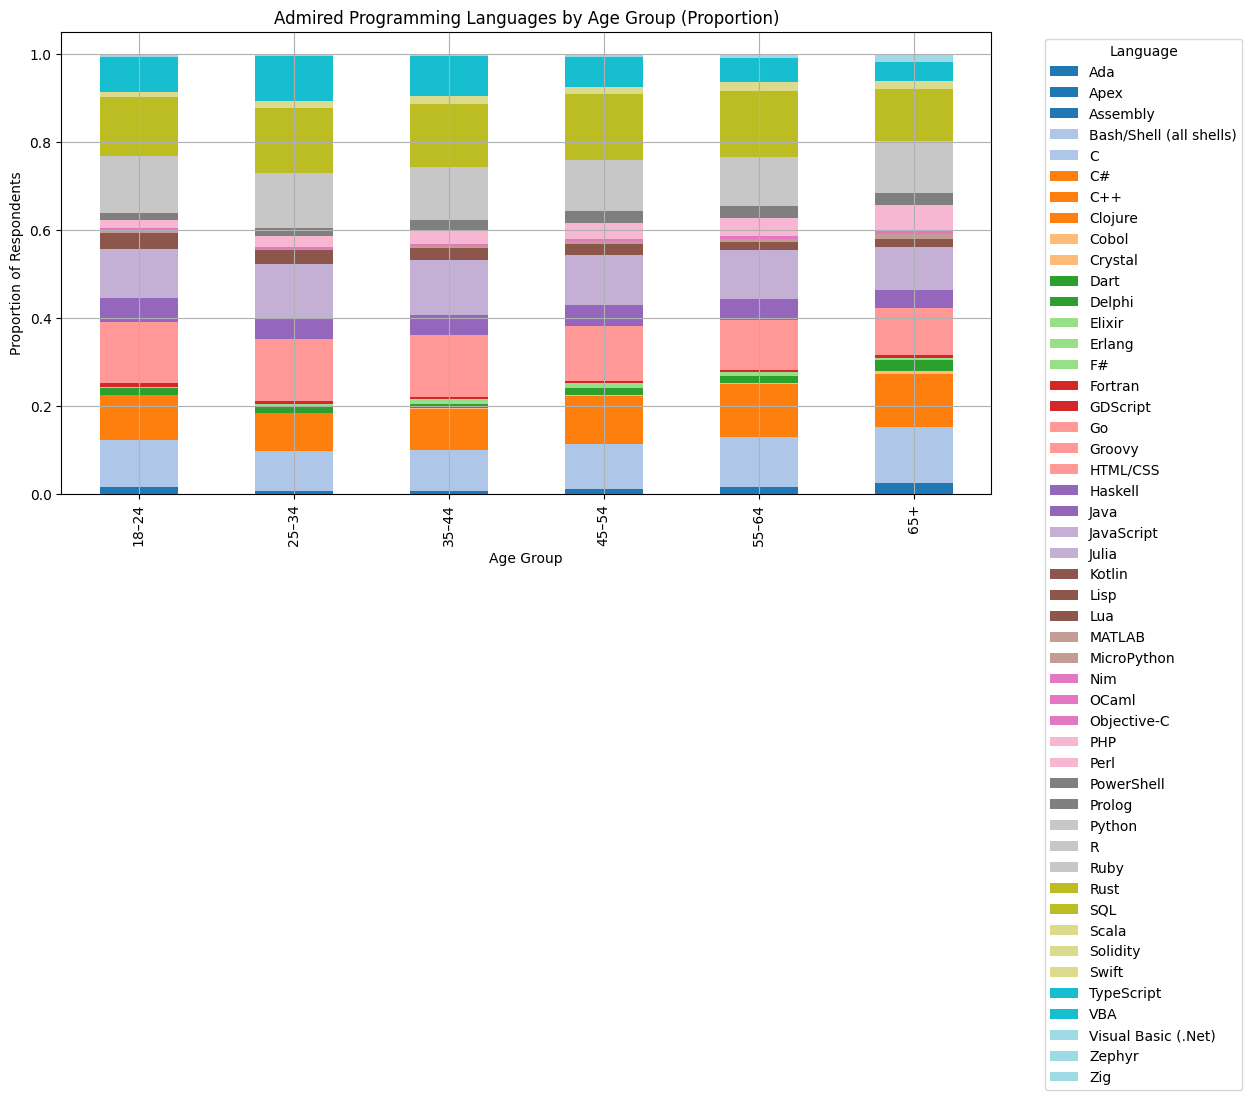

In [32]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create age bins
age_bins = [0, 24, 34, 44, 54, 64, 100]
age_labels = ['18–24', '25–34', '35–44', '45–54', '55–64', '65+']

# Step 2: Convert and bin the age column
df['Age_num'] = df['Age'].astype(str).str.extract(r'(\d{2})')
df['Age_num'] = pd.to_numeric(df['Age_num'], errors='coerce')
df['AgeGroup'] = pd.cut(df['Age_num'], bins=age_bins, labels=age_labels)

# Step 3: Expand the 'LanguageAdmired' multi-select column
lang_df = df[['AgeGroup', 'LanguageAdmired']].dropna()
lang_df = lang_df.assign(Language=lang_df['LanguageAdmired'].str.split(';'))
lang_exploded = lang_df.explode('Language')

# Step 4: Group by AgeGroup and Language
lang_counts = lang_exploded.groupby(['AgeGroup', 'Language'], observed=True).size().reset_index(name='Count')

# Step 5: Pivot the data for stacked bar plot
lang_pivot = lang_counts.pivot(index='AgeGroup', columns='Language', values='Count').fillna(0)

# Step 6: Normalize counts to proportions per age group
lang_prop = lang_pivot.div(lang_pivot.sum(axis=1), axis=0)

# Step 7: Plot
lang_prop.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

plt.title('Admired Programming Languages by Age Group (Proportion)')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Respondents')
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
plt.grid()
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


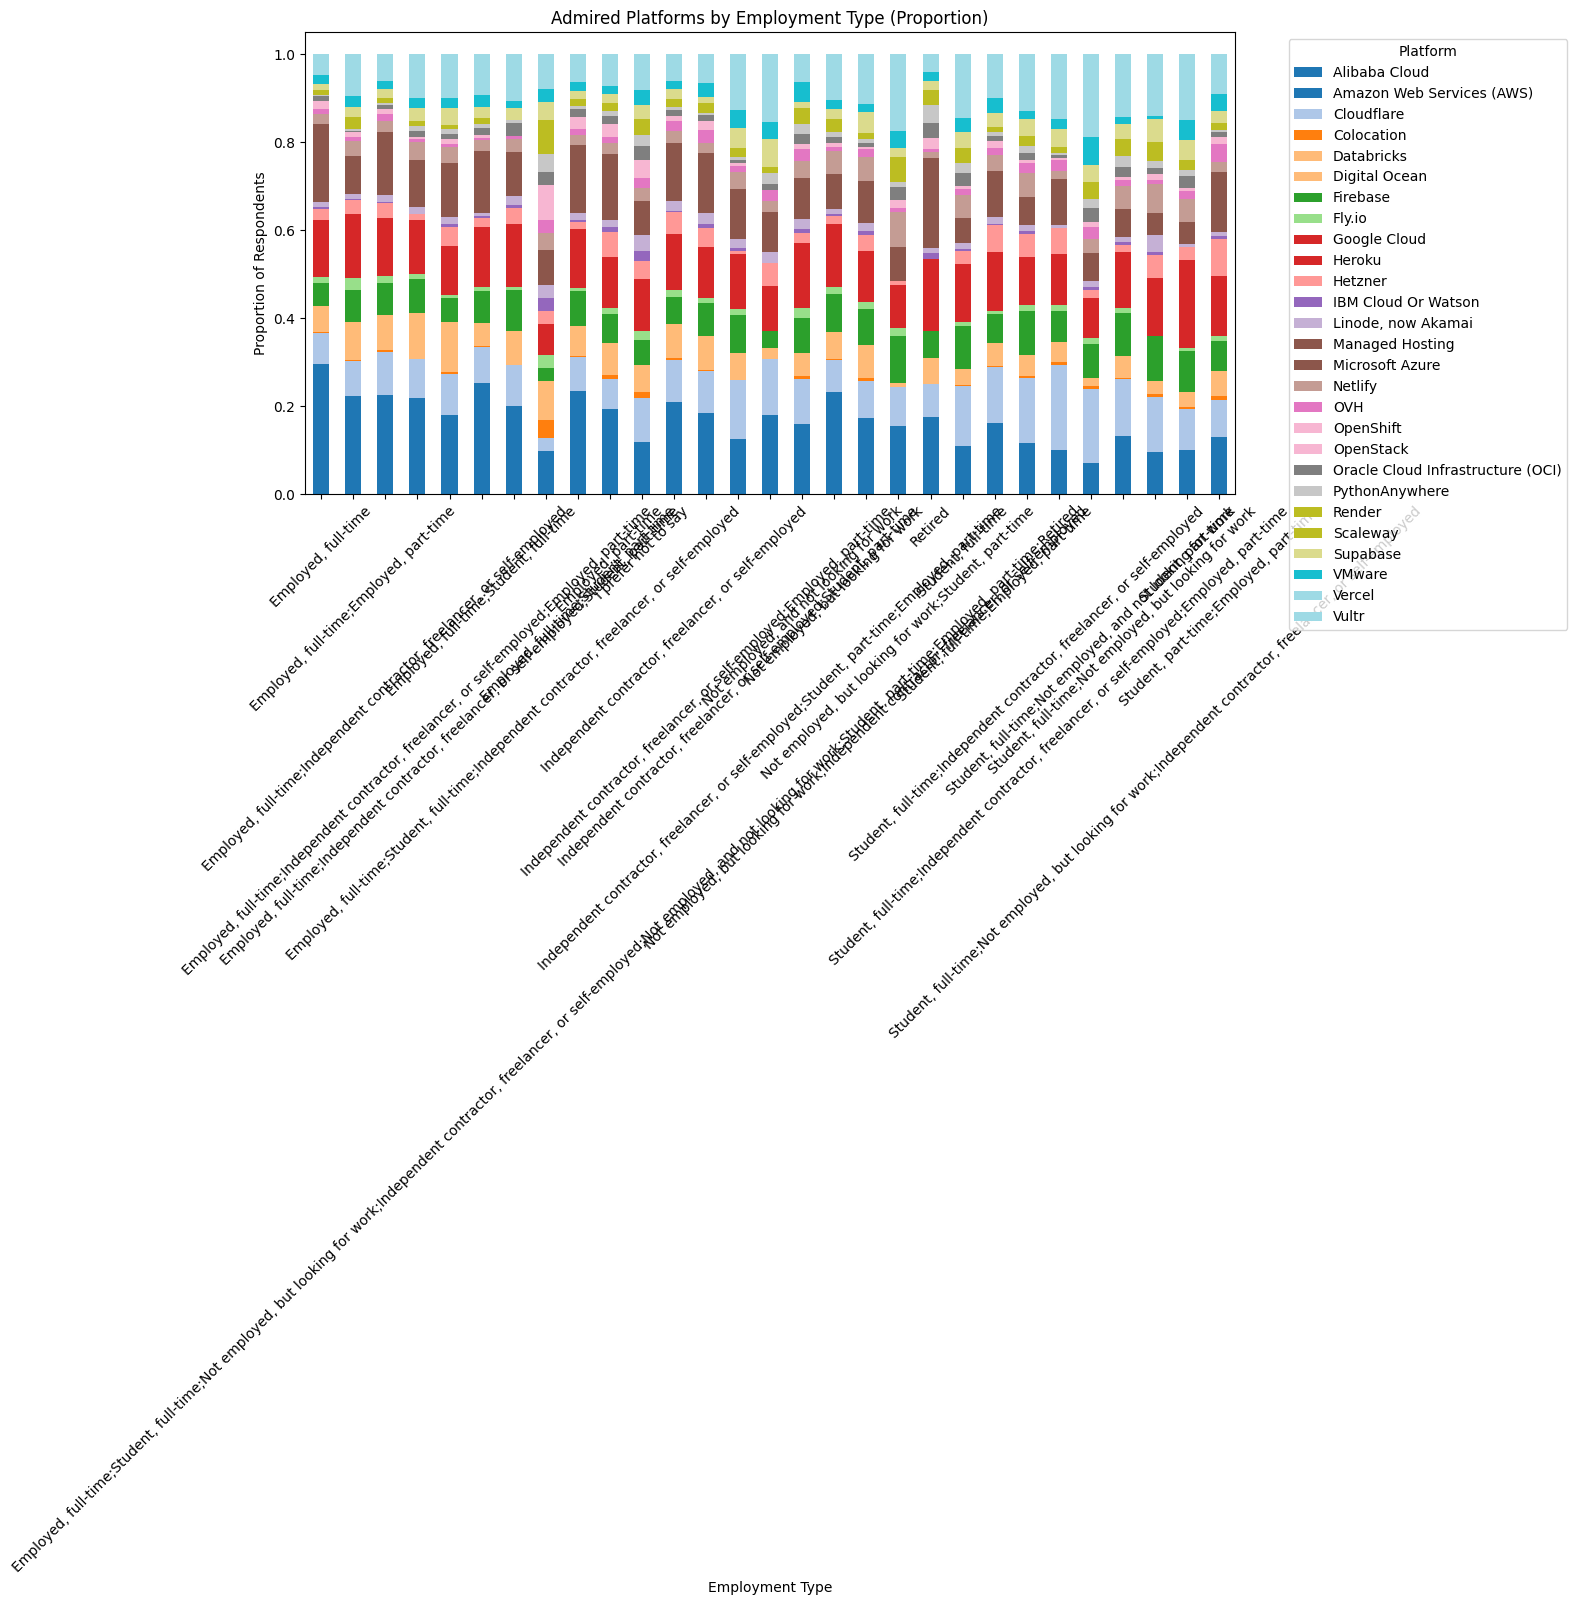

In [36]:
##Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter and expand PlatformAdmired
platform_df = df[['Employment', 'PlatformAdmired']].dropna()
platform_df = platform_df.assign(Platform=platform_df['PlatformAdmired'].str.split(';'))
platform_exploded = platform_df.explode('Platform')

# Step 2: Clean Employment types (optional: filter for most common ones)
employment_counts = platform_exploded['Employment'].value_counts()
top_employments = employment_counts[employment_counts > 50].index  # filter low-response categories
platform_filtered = platform_exploded[platform_exploded['Employment'].isin(top_employments)]

# Step 3: Count admired platforms per Employment type
counts = platform_filtered.groupby(['Employment', 'Platform']).size().reset_index(name='Count')

# Step 4: Pivot for stacked chart
pivot_df = counts.pivot(index='Employment', columns='Platform', values='Count').fillna(0)

# Step 5: Convert to proportions per employment type
pivot_prop = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Step 6: Plot
pivot_prop.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

plt.title('Admired Platforms by Employment Type (Proportion)')
plt.xlabel('Employment Type')
plt.ylabel('Proportion of Respondents')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
